# Ejercicios de inferencia paramétrica



In [33]:
%matplotlib inline
import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

from stats_utils import plot_dists

## Ejercicio

En cierto tipo de dispositivos de comunicaciones, la tasa de fallos $\lambda$ depende de cada dispositivo.

Si elegimos un dispositivo al azar, pensamos que la tasa de fallos del dispositivo sigue una distribución $\operatorname{Gamma}(\alpha=2, \beta=2)$.

Nos encargan elegir un dispositivo. Una tasa de 1 fallo / día o menor es compatible con el funcionamiento normal (si hay pocos fallos lo vuelve a intentar y se mantiene la calidad), pero si la tasa es mayor es necesario reemplazar el dispositivo, que es costoso.

Tenemos tres dispositivos, que han sido probados en condiciones diferentes:

 + Uno fue probado 1 día y no falló nunca.
 + Otro fue probado 4 días y falló una vez.
 + Otro fue probado 20 días y falló 7 veces.


Se pide

 - Encuentra la estimación de máxima verosimilitud para la tasa de fallos de cada dispositivo.
 - Actualiza el prior $\operatorname{Gamma}(\alpha=2, \beta=2)$ con los datos, para cada dispositivo por separado.
 - Encuentra la estimación MAP para la tasa de fallos de cada dispositivo.
 - ¿Cuál es la probabilidad, para cada dispositivo, de que la tasa de fallos sea menor que 1 fallo al día?


In [34]:
print('max ver modelo 1', 0/1)
print('max ver modelo 2', 1/4)
print('max ver modelo 3', 7/20)


max ver modelo 1 0.0
max ver modelo 2 0.25
max ver modelo 3 0.35


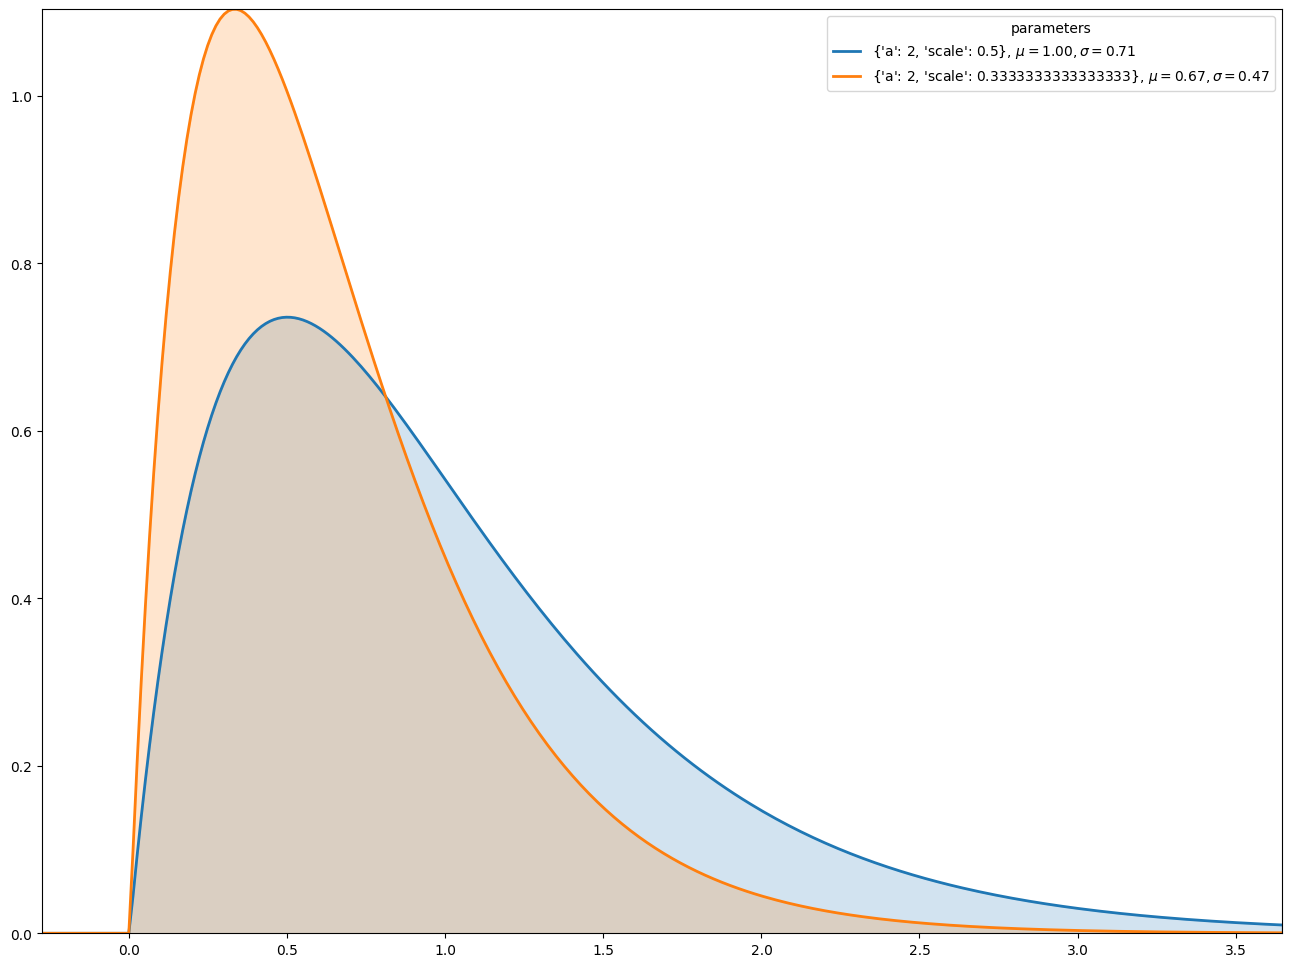

In [35]:
plot_dists([
    #prior
    st.gamma(a=2,scale=1/2),
    st.gamma(a=2+0,scale=1/(2+1))
])

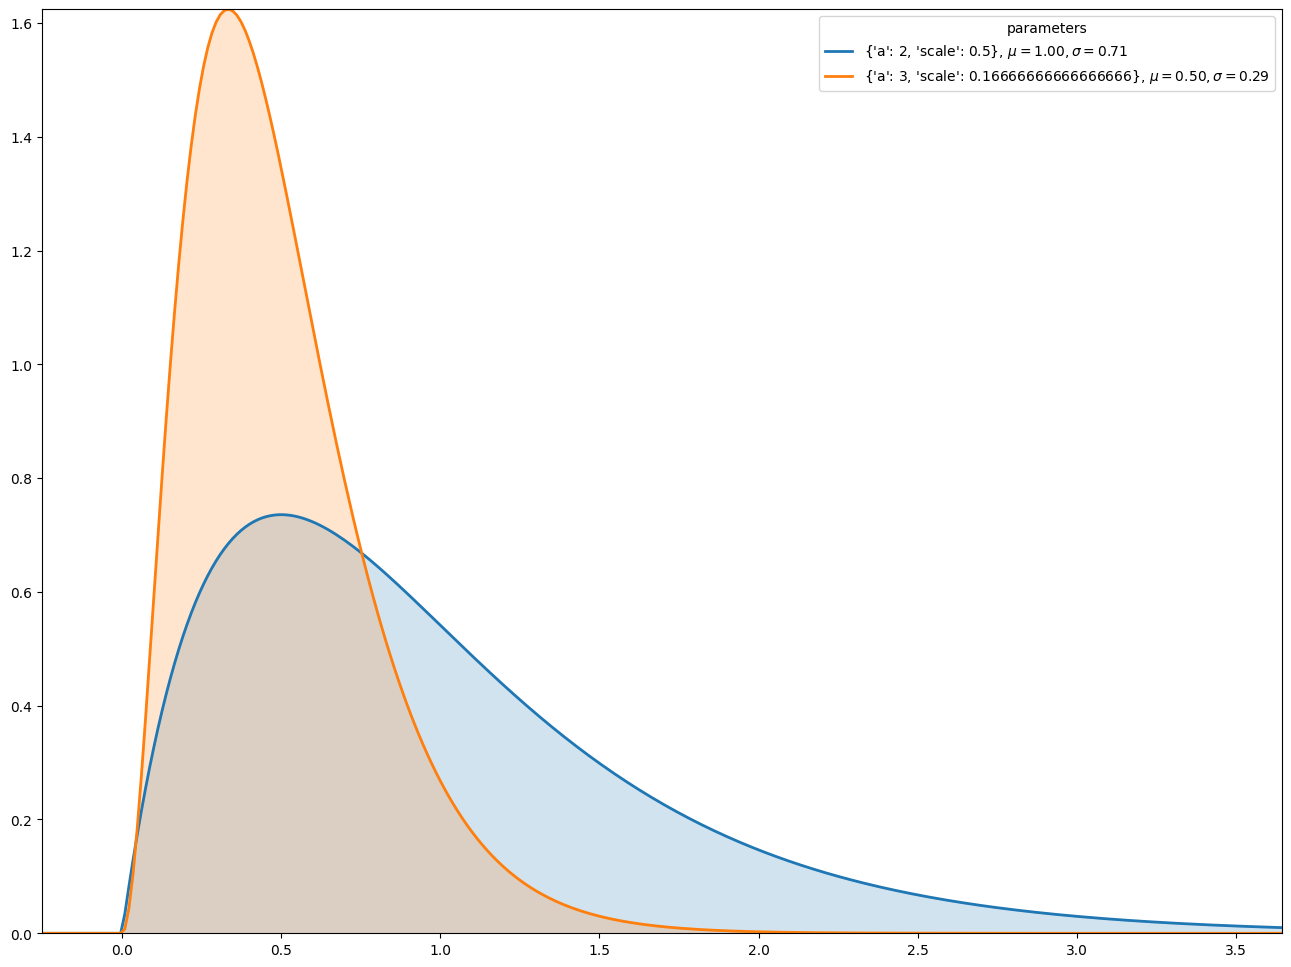

In [36]:
plot_dists([
    #prior
    st.gamma(a=2,scale=1/2),
    st.gamma(a=2+1,scale=1/(2+4))
])

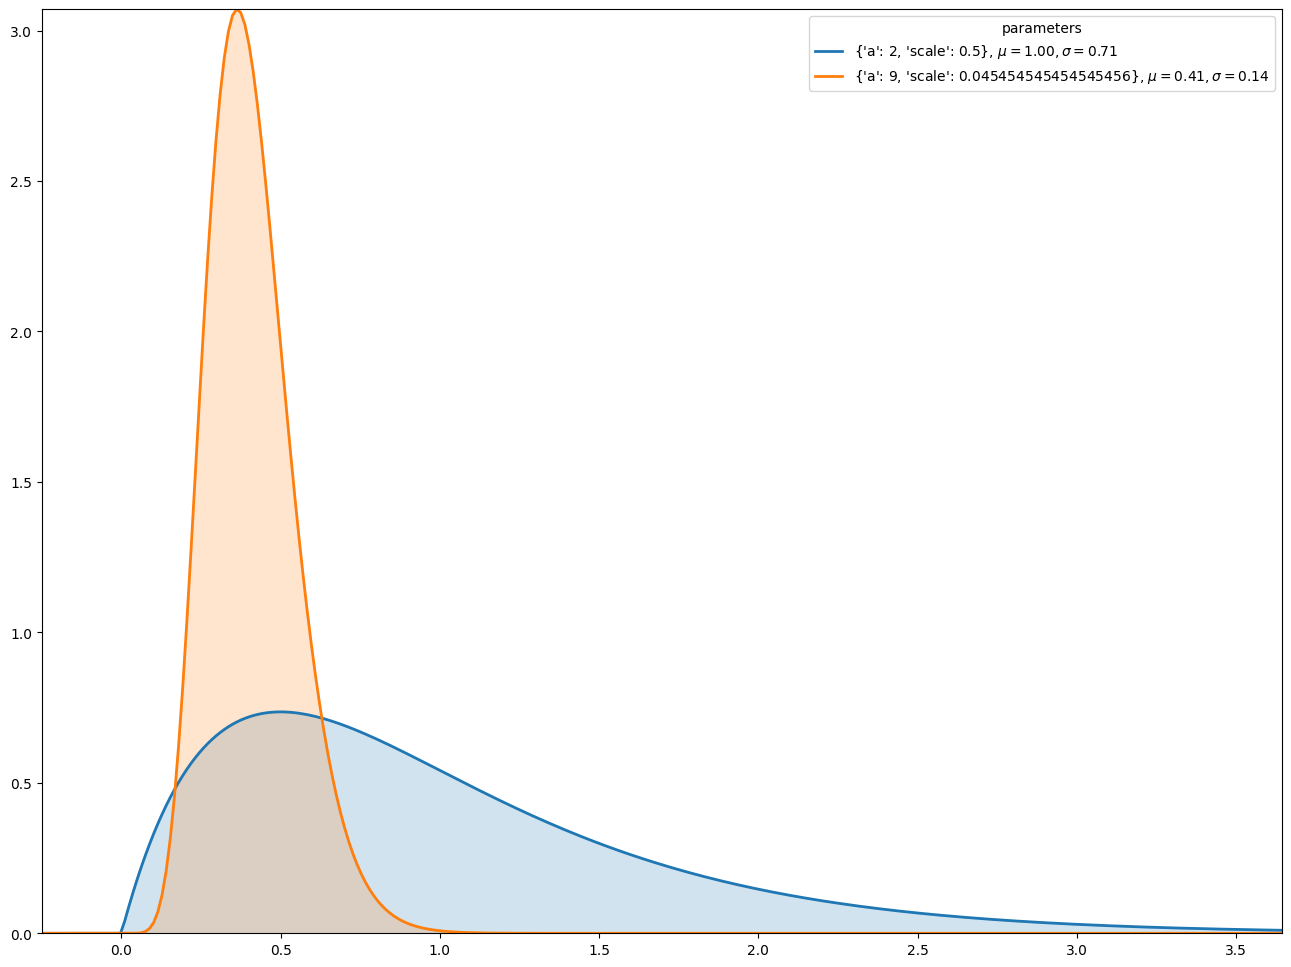

In [37]:
plot_dists([
    #prior
    st.gamma(a=2,scale=1/2),
    st.gamma(a=2+7,scale=1/(2+20))
])

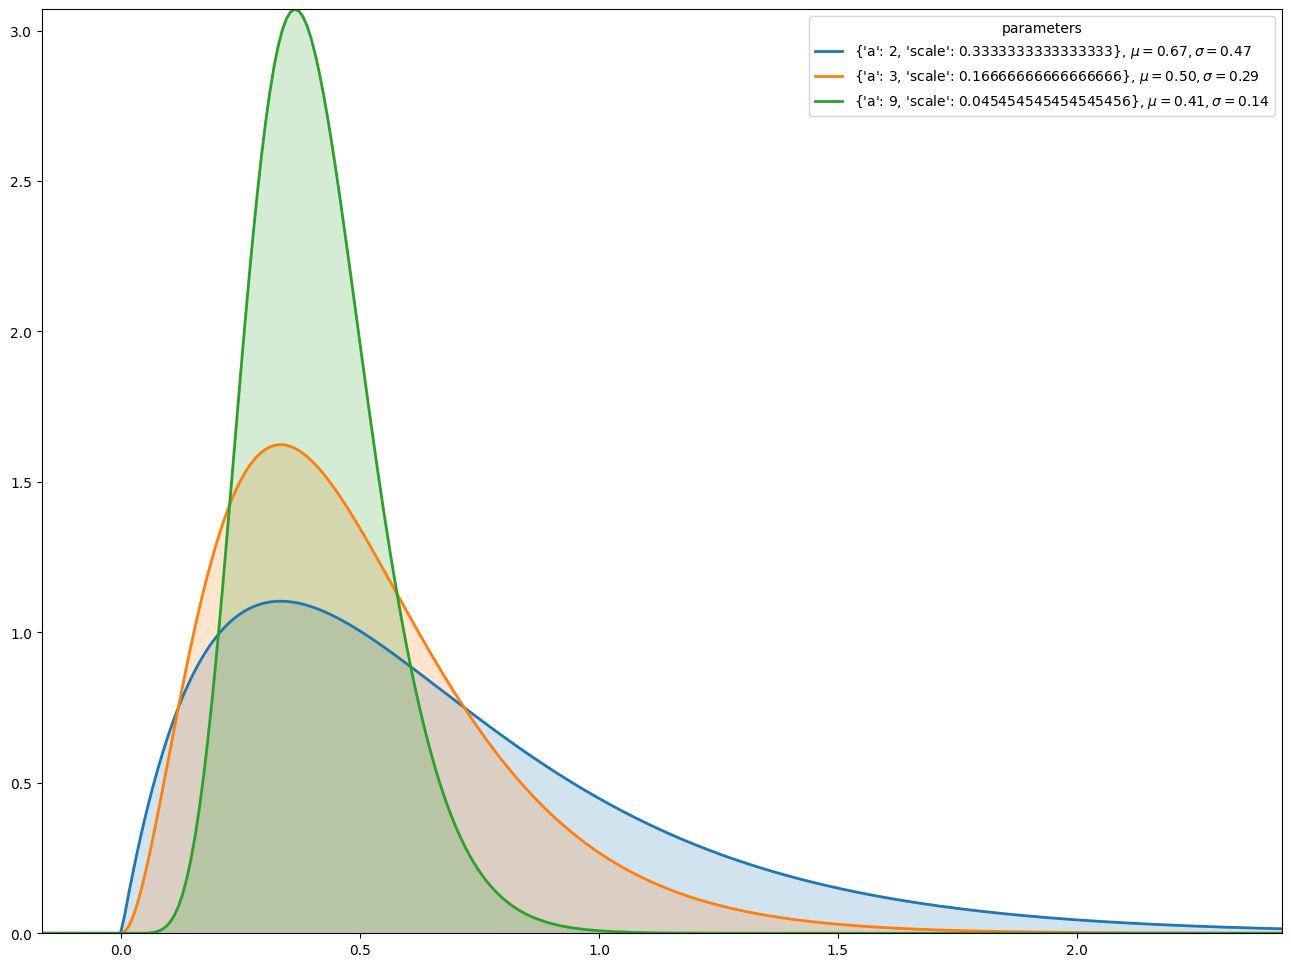

In [38]:
plot_dists([
    st.gamma(a=2+0,scale=1/(2+1)),
    st.gamma(a=2+1,scale=1/(2+4)),
    st.gamma(a=2+7,scale=1/(2+20)),
])

In [40]:
print('MAP modelo 1', (2 + 0 - 1)/(2 + 1) )
print('MAP modelo 2', (2 + 1 - 1)/(2 + 4) )
print('MAP modelo 3', (2 + 7 - 1)/(2 + 20) )


MAP modelo 1 0.3333333333333333
MAP modelo 2 0.3333333333333333
MAP modelo 3 0.36363636363636365


In [44]:
print('P(l1<1)=',st.gamma(a=2, scale=1/3).cdf(1))
print('P(l2<1)=',st.gamma(a=2+1, scale=1/(2+4)).cdf(1))
print('P(l3<1)=',st.gamma(a=2+7, scale=1/(2+20)).cdf(1))


P(l1<1)= 0.8008517265285442
P(l2<1)= 0.938031195583341
P(l3<1)= 0.9994230988333771


## Ejercicio

En el artículo siguiente:

> C.R. Weinberg and B.C. Gladen. _The beta-geometric distribution applied to comparative fecundability studies_. Biometrics, 42(3):547–560, 1986.

encontramos una tabla que recoge información sobre cuántos ciclos menstruales tuvieron que esperar mujeres que buscaban quedarse embarazadas, desglosados por mujeres fumadoras y no fumadoras.


| Número de ciclos | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12  | >= 12  |
| --------- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| Fumadoras | 29 | 16 | 17 | 4  |3  |9  |4 | 5 | 1 |1 |1 |  3 | 7  |
| No fumadoras | 198 | 107 | 55 | 38 | 18 | 22 | 7 | 9 | 5 | 3  | 6  |6  |12  |


Se pide

 -  Encuentra un modelo razonable para el fenómeno aleatorio _"número de ciclos menstruales hasta conseguir quedarse embarazada"_: ¿cuáles son los parámetros de este modelo?
 -  Encuentra la estimación de máxima verosimilitud para el parámetro, para cada grupo por separado.
 -  Encuentra la familia conjugada para el modelo elegido.
 -  Elige los valores de los hiperparámetros para un prior de la familia conjugada que corresponda al prior de Jeffreys.
 -  Actualiza tu prior con los datos de la tabla, para cada grupo por separado.
 -  Reporta intervalos de probabilidad al 90\% para cada uno de los dos parámetros (toma el percentil 5\% como el extremo inferior del intervalo de probabilidad y el percentil 95\% como el extremo superior).


In [14]:
fumadoras =  [29, 16, 17, 4 ,3 ,9 ,4, 5, 1,1,1,  3, 7]
no_fumadoras = [198, 107, 55, 38, 18, 22, 7, 9, 5, 3 , 6 ,6 ,12]


In [19]:
n = sum(fumadoras)
n

100

In [20]:
#29*1+ 16*2 + 17*3 + ...
sumxi = sum(m*(j+1)  for j,m in enumerate(fumadoras))
max_ver = n/sumxi
max_ver


0.23696682464454977

In [16]:
sum(no_fumadoras)

486

In [21]:
aprior = .5
bprior = .5
apost = aprior + 93
bpost = bprior + 486-93
plot_dists([
    st.beta(a=apost, b=bpost)
])

In [26]:
nexitos = sum(no_fumadoras) - 12
nexitos

474

In [28]:
# 198*1 + 107*2 + ...
nintentos = sum(m*(j+1)  for j,m in enumerate(no_fumadoras))
nfracasos = nintentos - nexitos
aprior = .5
bprior = .5
apost = aprior + nexitos
bpost = bprior + nfracasos
plot_dists([
    st.beta(a=apost, b=bpost)
])

In [30]:
nof_post = st.beta(a=apost, b=bpost)
nof_post.ppf(0.005), nof_post.ppf(0.995)

(0.29766088639615995, 0.3613429213557971)